# 🎬 Netflix Content Insight Project

## 📊 Business Goal:
_What content trends can Netflix leverage to optimize user engagement and market expansion?_  

👉 Identify popular genres and content formats (TV vs Movie)  
👉 Understand country-specific content trends  
👉 Provide actionable insights for content strategy  

---

## 🚀 Project Steps:

1️⃣ **Setup & Import Libraries**  
➡️ Purpose: Prepare Python tools for analysis  
➡️ Skill: Python, Pandas, Matplotlib, Seaborn  

2️⃣ **Load & Clean Data**  
➡️ Purpose: Ensure data quality for analysis  
➡️ Skill: Data wrangling (handling missing, parsing dates)  

3️⃣ **Explore & Visualize Data**  
➡️ Purpose: Uncover trends in type, country, genre  
➡️ Skill: EDA, Visualization, Storytelling  

4️⃣ **Insight Generation & Conclusion**  
➡️ Purpose: Communicate actionable recommendations  
➡️ Skill: Critical thinking, stakeholder communication  

---

## 1️⃣ Setup & Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style='whitegrid')

## 2️⃣ Load & Clean Data

**Purpose:** Prepare the dataset for analysis by handling missing values and extracting useful features.

In [ ]:
# Load dataset
df = pd.read_csv('../data/netflix_titles.csv')

# Display basic info
df.shape, df.columns

# Check missing values
df.isnull().sum()

# Fill missing country values
df['country'] = df['country'].fillna('Unknown')

# Convert date_added to datetime
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year of addition
df['year_added'] = df['date_added'].dt.year

# Create list of genres
df['genre_list'] = df['listed_in'].str.split(',')

## 3️⃣ Explore & Visualize Data

### 3.1 Content Type Distribution (TV Shows vs Movies)

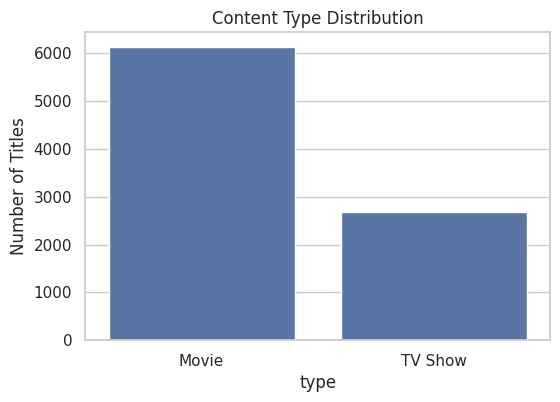

In [ ]:
type_counts = df['type'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.title('Content Type Distribution')
plt.ylabel('Number of Titles')
plt.savefig('../output/type_trend.png')
plt.show()

### 3.2 Top Content-Producing Countries

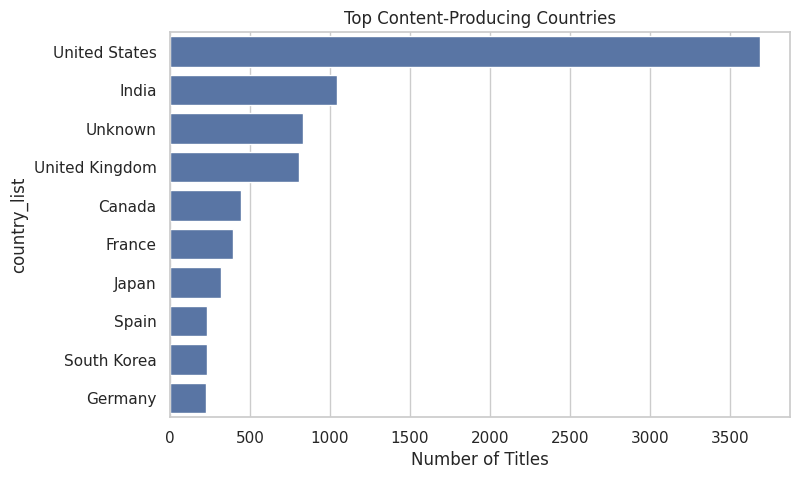

In [ ]:
# Correct version
df['country_list'] = df['country'].fillna('Unknown').str.split(',')
df_exploded_country = df.explode('country_list')
df_exploded_country['country_list'] = df_exploded_country['country_list'].str.strip()

country_counts = df_exploded_country['country_list'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(y=country_counts.index, x=country_counts.values)
plt.title('Top Content-Producing Countries')
plt.xlabel('Number of Titles')
plt.savefig('../output/country_trend.png')
plt.show()


### 3.3 Top Genres on Netflix

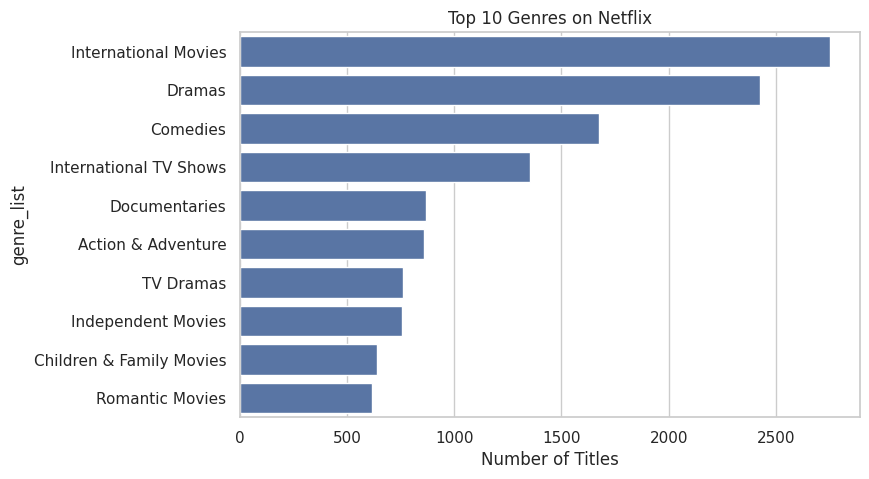

In [ ]:
df_exploded = df.explode('genre_list')
df_exploded['genre_list'] = df_exploded['genre_list'].str.strip()

genre_counts = df_exploded['genre_list'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(y=genre_counts.index, x=genre_counts.values)
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.savefig('../output/genre_trend.png')
plt.show()

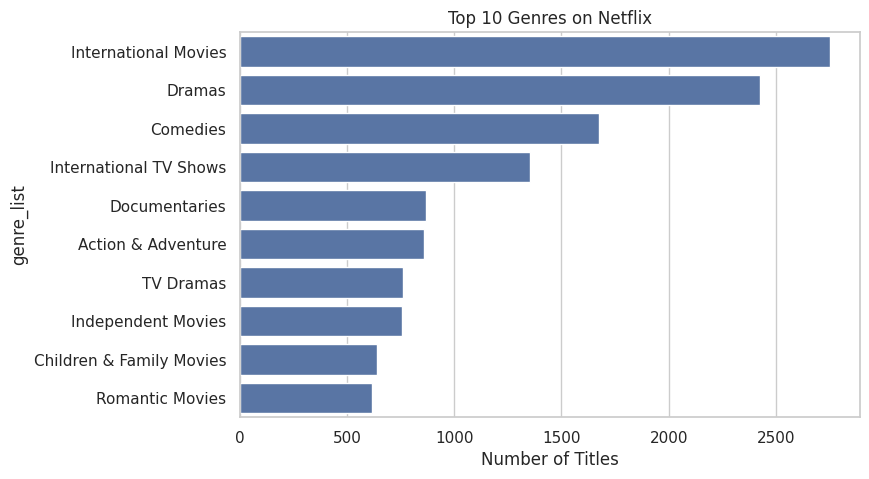

In [ ]:
# First: split genres into list
df['genre_list'] = df['listed_in'].str.split(',')

# Then explode
df_exploded = df.explode('genre_list')

# Strip spaces
df_exploded['genre_list'] = df_exploded['genre_list'].str.strip()

# Now count genres
genre_counts = df_exploded['genre_list'].value_counts().head(10)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(y=genre_counts.index, x=genre_counts.values)
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.savefig('../output/genre_trend.png')
plt.show()


List of all countries

In [ ]:
# Fill missing countries with "Unknown"
df['country'] = df['country'].fillna('Unknown')

# Split multi-country entries (ex: "United States, India")
df['country_list'] = df['country'].str.split(',')

# Explode into one row per country
df_exploded_country = df.explode('country_list')
df_exploded_country['country_list'] = df_exploded_country['country_list'].str.strip()

# Count number of titles per country
country_counts = df_exploded_country['country_list'].value_counts()

# Display all
for country, count in country_counts.items():
    print(f"{country}: {count} titles")


United States: 3690 titles
India: 1046 titles
Unknown: 831 titles
United Kingdom: 806 titles
Canada: 445 titles
France: 393 titles
Japan: 318 titles
Spain: 232 titles
South Korea: 231 titles
Germany: 226 titles
Mexico: 169 titles
China: 162 titles
Australia: 160 titles
Egypt: 117 titles
Turkey: 113 titles
Hong Kong: 105 titles
Nigeria: 103 titles
Italy: 100 titles
Brazil: 97 titles
Argentina: 91 titles
Belgium: 90 titles
Indonesia: 90 titles
Taiwan: 89 titles
Philippines: 83 titles
Thailand: 70 titles
South Africa: 62 titles
Colombia: 52 titles
Netherlands: 50 titles
Denmark: 48 titles
Ireland: 46 titles
Sweden: 42 titles
Poland: 41 titles
Singapore: 41 titles
United Arab Emirates: 37 titles
New Zealand: 33 titles
Lebanon: 31 titles
Norway: 30 titles
Israel: 30 titles
Chile: 29 titles
Russia: 27 titles
Malaysia: 26 titles
Pakistan: 24 titles
Czech Republic: 22 titles
Switzerland: 19 titles
Romania: 14 titles
Uruguay: 14 titles
Saudi Arabia: 13 titles
Austria: 12 titles
Luxembourg: 12 t

In [16]:
# Count how many of each type (TV Show or Movie)
type_counts = df['type'].value_counts()

# Print results
for content_type, count in type_counts.items():
    print(f"{content_type}: {count} titles")


Movie: 6131 titles
TV Show: 2676 titles



```markdown
# 📌 Conclusion & Business Recommendations:

---

## 🔍 What we learned from the data

---

### 1️⃣ Content Types

- **Movies**: 6131 titles  
- **TV Shows**: 2676 titles  

👉 There are more **Movies**, but **TV Shows** (2676) help keep people watching longer (binge-watching).

---

### 2️⃣ Where content comes from (Top Countries)

| Country          | Titles |
|------------------|--------|
| United States    | 3690   |
| India            | 1046   |
| United Kingdom   | 806    |
| Canada           | 445    |
| France           | 393    |
| Japan            | 318    |
| South Korea      | 231    |
| Germany          | 226    |
| Mexico           | 169    |
| Spain            | 232    |

👉 Netflix is very strong in the US (3690), but content from **India (1046)**, **Japan (318)**, **Korea (231)**, and Europe is growing.  
👉 **Emerging markets** (Mexico, Turkey, South Africa) also show growth.

---

### 3️⃣ What kinds of shows/movies (Genres)

| Genre                           | Titles |
|---------------------------------|--------|
| International Movies            | 2752   |
| Dramas                          | 2427   |
| Comedies                        | 1674   |
| International TV Shows          | 1351   |
| Documentaries                   | 869    |
| Action & Adventure              | 859    |
| TV Dramas                       | 763    |
| Independent Movies              | 756    |
| Children & Family Movies        | 641    |
| Romantic Movies                 | 616    |

👉 International content is popular — **2752 International Movies** and **1351 International TV Shows**.  
👉 **Dramas (2427)** and **Comedies (1674)** are audience favorites.  
👉 **Documentaries (869)** and **Kids & Family (641)** do very well too.

---

## 🎯 What Netflix should do next

---

### 1️⃣ Make more binge-worthy shows

✅ Invest in more **TV shows**:  
- **TV Dramas (763)**  
- **International TV Shows (1351)**  
- **Docuseries (395)**  
- **Reality TV (255)**  

These help users watch longer and keep coming back.

---

### 2️⃣ Grow content from more countries

✅ Invest more in **local shows** for fast-growing markets:  
- India (1046 titles)  
- South Korea (231)  
- Japan (318)  
- Spain (232)  
- Turkey (113)  
- South Africa (62)

Local content helps attract **new subscribers** in these countries.

---

### 3️⃣ Add more of these genres

✅ Low-cost, popular content:  
- **Docuseries (395)**  
- **Children & Family Movies (641)**  
- **Reality TV (255)**  
- **Romantic TV Shows (370)**  

✅ Also grow:  
- **Horror Movies (357)**  
- **Thrillers (577)**  
- **Sci-Fi & Fantasy (243)**  

These are growing and audiences want more.

---


## 🚀 Final Summary

✅ Netflix is strong in **International content (2752 movies)** and **Dramas (2427 titles)**.  
✅ More **TV shows (2676)** will help keep users engaged.  
✅ Local stories + popular genres = more growth.  


---
```

---




_Prepared by: Liliane Konissi_  
_Date: June 2025_